In [9]:
from psaw import PushshiftAPI
import pandas as pd
import seaborn as sns

In [16]:
#scraping function using pushshiftAPI
def scrape_data(subreddit):
    api = PushshiftAPI()
    subreddit_list = list(api.search_submissions(subreddit=subreddit, filter=['title','subreddit'], limit=20000))
    
    #filter list to show title and subbredit only
    scrape_list = []
    for i in range(len(subreddit_list)):
        scrape_dict = {}
        scrape_dict['subreddit'] = subreddit_list[i][1]
        scrape_dict['title'] = subreddit_list[i][2]
        scrape_list.append(scrape_dict)
    return(scrape_list)

In [17]:
# function call and create DataFrame
df_nottheonion = pd.DataFrame(scrape_data('nottheonion'))
df_onion = pd.DataFrame(scrape_data('theonion'))



In [18]:
def clean_data(dataframe):

    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    
    # Remove punctation
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')

    # Remove numbers 
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')

    # Make sure any double-spaces are single 
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')

    # Transform all text to lowercase
    dataframe['title'] = dataframe['title'].str.lower()
    
    print("New shape:", dataframe.shape)
    return dataframe.head()


In [19]:
clean_data(df_onion)
clean_data(df_nottheonion)

New shape: (16127, 2)
New shape: (15531, 2)


,subreddit,title
0,nottheonion,monkeys steal coronavirus blood samples in india
2,nottheonion,virat kohli should divorce anushka sharma says...
3,nottheonion,wisconsin sends pounds of cheese to houston
4,nottheonion,grimes plans to legally sell her soul to the t...
5,nottheonion,monkey steals covid patients blood samples in ...


In [20]:
# Combine df_onion & df_nottheonion with only 'subreddit' (target) and 'title' (predictor) columns
df = pd.concat([df_onion[['subreddit', 'title']], df_nottheonion[['subreddit', 'title']]])

# Label FakeNews with 1 and RealNews with 0
df["subreddit"] = df["subreddit"].map({"nottheonion": 0, "TheOnion": 1})

#save final dataframe to csv
df.to_csv('./clean_data.csv')

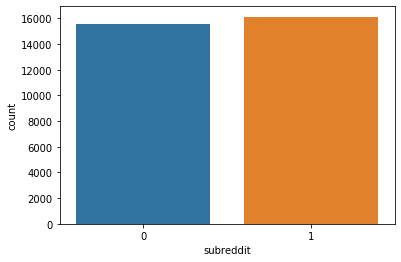

In [21]:
sns.countplot(x='subreddit', data=df)